## Training the machine learning model

### The purpose of this file

This workbook has been designed to train different machine learning models on the <i>final dataset</i> created in <i>Managing_data.ipynb</i> and to choose the best performing one. 
In this workbook I 
- preprocess the data (check distribution,carry out log transformation if necessary, choose one from normalisation or standardisation);
- split the prepared dataset into train and test dataset;
- define metrics to test the performance of the model trained later in this workbook;
- create a general function to train and test the model;
- compare and contrast the perfromance of the different models and I choose one to test it in front of the class live.

### Importing libraries

In [1]:
# general libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
import time as t

# preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#train-test-split
from sklearn.model_selection import train_test_split

# metrics scores
from sklearn.metrics import precision_score, recall_score, f1_score


In [58]:
# reading the data

df = pd.read_csv('final_dataset.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,r_x,r_y,r_ang,id
0,16.5,4.4,-18.5,0
1,19.5,5.2,1.1,0
2,19.5,4.5,6.5,0
3,12.4,15.9,107.3,1
4,20.4,28.9,355.8,2


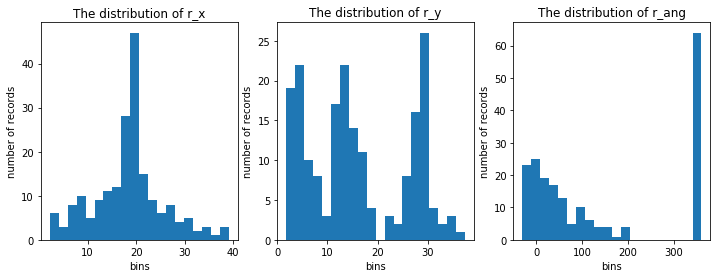

In [59]:
# checking the distribution of the data ( along all the 3 axes)

fig, axes = plt.subplots(1,3, figsize = (12,4))

columns = ['r_x', 'r_y', 'r_ang']

def distribution(df,columns,i):
    axes[i].hist(df[columns[i]], bins = 20)
    axes[i].set_title(f'The distribution of {columns[i]}')
    axes[i].set_xlabel('bins')
    axes[i].set_ylabel('number of records')
    
    
for i in range(3):
     distribution(df,columns, i)

plt.show()


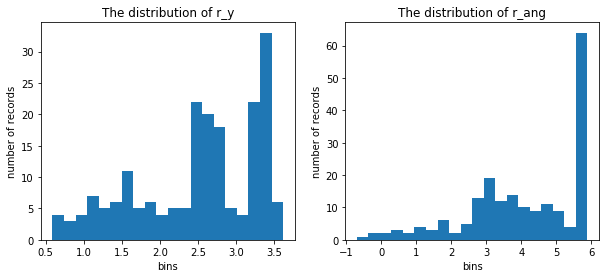

Are you happy with the new distribution? Y/ny


,r_x,r_y,r_ang,id
0,16.5,1.481605,2.917771,0
1,19.5,1.648659,0.095310,0
2,19.5,1.504077,1.871802,0
3,12.4,2.766319,4.675629,1
4,20.4,3.363842,5.874369,2


In [60]:
"""
If the distribution of the features is skewed, log transformation can help approach the normal distribution.
After checking the distribution of the features above, you can choose the features that should be log transformed.
Please type the name of columns below, into the list called features and run the cell. Check whether the transformation
helped forming a normal like distribution. If yes, you can modify the original dataframe.
For features, please put the name(s) of the column(s) (e.g. 'r_x') in the list called features. 
"""

#defining a function for log transformation
def log_transform(features):
    temp_fr = pd.DataFrame(data = df[features])
    temp_fr_log = temp_fr.apply(lambda x: np.log(np.abs(x)))
    return temp_fr_log

# Add the names of the features to log transform
features = ['r_y', 'r_ang'] # you can choose different features and replace mine choice in the list
temp_fr_log = log_transform(features)


#plotting the transformed data
if len(features) ==1:
    fig = plt.figure(figsize = (10,4))
    axes = fig.add_axes([0,0,1,1])
    axes.hist(temp_fr_log, bins = 5)
    axes.set_title(f'The distribution of {features[0]}')
    axes.set_xlabel('bins')
    axes.set_ylabel('number of records')
else:
    fig, axes = plt.subplots(1,len(features), figsize = (10, 4))
    for i in range(temp_fr_log.shape[1]):
        distribution(temp_fr_log,temp_fr_log.columns, i)
plt.show()

# modify the original dataframe if necessary
change = input("Are you happy with the new distribution? Y/n")
if change!= 'n':
    for feature in features:
        df[feature] = temp_fr_log[feature]

df.head()


### Standardising or normalising the data

Before training the machine learning model against the data, it is worth to standardise or normalise it to achive a better performance.. 
A <b>normalised data</b> means that all data instances are converted to a number between 0 and 1 so all the numbers will be in the same order or magnitude. It can be done by min-max caling using the formula

$x_{n}^{i}$ = $\frac{x_{i} - x_{min}}{x_{max} - x_{min}}$.

<b> Standardising the data </b> is often more useful to train an accurate ML model. Standardisation means that we convert the dataset to a form for which the mean is 0 and the standard deviation is 1. The formula for standardisation is

$x_{std}^{i}$ = $\frac{x_{i} - \mu_{x}}{\sigma_{x}}$.

In the next two cells you can either normalise or standardise the dataset before training the ML algorithm.
<b> Feautures are r_x, r_y and r_ang but not <i>id</i> because latter is target data. </b>

In [4]:
def normalise(features):
    normal = MinMaxScaler()
    features_norm = normal.fit_transform(features)
    return features_norm



In [5]:
def standardise(features):
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    return features_scaled

In [61]:
# use one of the scaling method before getting to the ML algorithms

data_scaled = standardise(df[['r_x', 'r_y', 'r_ang']])
data_scaled.shape

(195, 3)

### Splitting the data sets to train and test sets

In this section I split the dataset into train and test dataset. Features are df[['r_x, 'r_y', 'r_ang']] and the target is df['id']. Calling the function below you can choose the ratio of the size of the test and train dataset. I chose 20% test and 80% train size but it can easily be changed.

In [7]:
# split the data set to train and test dataset, adding the ratio of the size of train and test sets

def split_data(data_scaled,target,ratio):
    X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size = ratio, random_state =42)
    
    print(f'The train set has {X_train.shape[0]} elements')
    print(f'The test set has {X_test.shape[0]} elements')
    
    return X_train, X_test, y_train, y_test

In [62]:
# target = df['id'], ratio = the ratio of the size of the test set related to the entire dataset

ratio = input('What proprotion of the dataset would you like to use as test dataset? (0.0-1.0)')

X_train, X_test, y_train, y_test = split_data(data_scaled, df['id'], float(ratio))

What proprotion of the dataset would you like to use as test dataset? (0.0-1.0)0.2
The train set has 156 elements
The test set has 39 elements


### Choosing metrics to test the performance of the algorithms

Before training the ML models, it is worth to choose metrics to monitor the model's preformance and tune hypermarameters to obtain the best performance.
The most used metrics are precision, recall and F1 scores, so I will choose those too.

<b>Precision</b> is the metrics that tells the propirtion of true positive predicition among the postitive predictions, so 
precision = $\frac{true positive}{true positive + false positive}$ 

<b>Recall</b> is the ratio of true positive predictions among the real positive test data instances, so 
recall = $\frac{true positive}{true positive + false negative}$ 

<b>F1 score</b> is formed as a combination of recall and precision as follows:
F1 score = 2$\frac{precision x recall}{precision + recall}$

In the cells below, I design three functions to get the mentioned metrics scores. I will call those functions after training the ML models to check, how well it performs. 

In [9]:
# define precision score

def precision(y_true, y_pred):
    precision = precision_score(y_true = y_true, y_pred = y_pred, average = 'macro')
    return precision

In [10]:
# define recall score

def recall(y_true, y_pred):
    recall = recall_score(y_true = y_true, y_pred = y_pred, average = 'macro')
    return recall

In [11]:
# define F1 score

def f1(y_true, y_pred):
    f1 =f1_score(y_true = y_true, y_pred = y_pred, average = 'macro')
    return f1

### Training the Machine Learning models

In this section, I will train four different machine learning models: <b><i> support vector machine </i></b> model, <b><i> decision tree </i></b> model, <b><i> random forest </i></b> model and the <b><i> K nearest algorithm  </i></b>. I don't want to detail how those models work, but the book <i> Python Machine Learning </i> by <i> Sebastian Raschka </i> and <i> Vahid Mirjalili </i> gives a great insight into the working principles of them. I chose those algorithms because I feel that they are the best in a classification problem I presented with the last graph in the workbook <i> Managing_data.ipynb</i>. 

I train and test each model in a different section, but I will summarize their performance to choose the model which will be used live in the classroom. The choice depends on how accurately the model works and how fast it does its job.


### General function for training and testing

In [12]:
'''

Description:
This function is for training the ML model and test its performance. I will call the function with all the ML algorithms
mentioned above and test how well and how fast they perform. 
I also would like to show how important it is to train the model against larger amount of data and how its perfomance is
affected by the size of the test dataset. Therefore, I add a new parameter called sample_size to the function.

Argument: 
1. learner: the ML algorithm object
2. learner_name: the learner's name as a string
2. sample_size: the percentage of the size of the training dataset (e.g. 10% = 0.1)
3. X_train: feature train dataset
4. X_test : feature test dataset
5. y_train: target train dataset
6. y_test: target test dataset

Returns: precision_score, recall_score, F1_score and performance time to the learner, and the different sample_size
'''

def train_predict(learner,learner_name, sample_size, X_train, X_test, y_train, y_test):
    
    # train the model and make prediction
    start = t.time()
    sample_size = int(sample_size*X_train.shape[0])
    print(f'The training set has {sample_size} elements out of the {X_train.shape[0]} elements.')
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    prediction_test = learner.predict(X_test)
    end = t.time()
    
    time_taken = end - start
    
    # add accuracy scores
    precision_score = precision(y_test, prediction_test)
    recall_score = recall(y_test, prediction_test)
    F1_score = f1(y_test, prediction_test)
    
    return [learner_name, sample_size, X_train.shape[0], precision_score, recall_score, F1_score, time_taken]



### Support Vector Machine Model

In [70]:
# creating the support vector machine object
from sklearn.svm import SVC

learner = SVC(kernel = 'rbf', C = 1, random_state = 42)
learner_name = 'SVM'
sample_size = [0.5, 0.7, 0.8, 1.0]

#training the model for different sample size and testing it for precision, recall, f1-score and time
accuracy_list = []
for size in sample_size:
    to_list = train_predict(learner, learner_name, size, X_train, X_test, y_train, y_test)
    accuracy_list.append(to_list)

frame_SVM = pd.DataFrame(data = accuracy_list, columns = ['name', 'sample', 'train set', 'precision', 'recall', 'F1', 'time'])
print('The accuracy data in a table: \n', frame_SVM)

# print some graphs later

The training set has 78 elements out of the 156 elements.
The training set has 109 elements out of the 156 elements.
The training set has 124 elements out of the 156 elements.
The training set has 156 elements out of the 156 elements.
The accuracy data in a table: 
   name  sample  train set  precision  recall   F1      time
0  SVM      78        156        1.0     1.0  1.0  0.005984
1  SVM     109        156        1.0     1.0  1.0  0.003990
2  SVM     124        156        1.0     1.0  1.0  0.002995
3  SVM     156        156        1.0     1.0  1.0  0.004984


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

### Decesion tree

In [64]:
# creating the decision tree object
from sklearn.tree import DecisionTreeClassifier

learner = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 42)
learner_name = 'Decision Tree'
sample_size = [0.5, 0.7, 0.8, 1.0]

#training the model for different sample size and testing it for precision, recall, f1-score and time
accuracy_list = []
for size in sample_size:
    to_list = train_predict(learner, learner_name, size, X_train, X_test, y_train, y_test)
    accuracy_list.append(to_list)
    

frame_DT = pd.DataFrame(data = accuracy_list, columns = ['name', 'sample', 'train set', 'precision', 'recall', 'F1', 'time'])
print('The accuracy data in a table: \n', frame_DT)

# print some graphs later

The training set has 78 elements out of the 156 elements.
The training set has 109 elements out of the 156 elements.
The training set has 124 elements out of the 156 elements.
The training set has 156 elements out of the 156 elements.
The accuracy data in a table: 
             name  sample  train set  precision    recall        F1      time
0  Decision Tree      78        156   0.944444  0.962963  0.950089  0.009945
1  Decision Tree     109        156   0.873294  0.862963  0.867236  0.001993
2  Decision Tree     124        156   0.969697  0.981481  0.974603  0.001995
3  Decision Tree     156        156   0.969697  0.981481  0.974603  0.003989


### Random forest classifier

In [65]:
# creating the random forest classifier object
from sklearn.ensemble import RandomForestClassifier

learner = RandomForestClassifier(n_estimators = 10, criterion = 'gini', max_depth = 2, random_state = 42)
learner_name = 'Random Forest'
sample_size = [0.5, 0.7, 0.8, 1.0]

#training the model for different sample size and testing it for precision, recall, f1-score and time
accuracy_list = []
for size in sample_size:
    to_list = train_predict(learner, learner_name, size, X_train, X_test, y_train, y_test)
    accuracy_list.append(to_list)
    

frame_RF = pd.DataFrame(data = accuracy_list, columns = ['name', 'sample', 'train set', 'precision', 'recall', 'F1', 'time'])
print('The accuracy data in a table: \n', frame_RF)

# print some graphs later

The training set has 78 elements out of the 156 elements.
The training set has 109 elements out of the 156 elements.
The training set has 124 elements out of the 156 elements.
The training set has 156 elements out of the 156 elements.
The accuracy data in a table: 
             name  sample  train set  precision    recall        F1      time
0  Random Forest      78        156   0.969697  0.981481  0.974603  0.018926
1  Random Forest     109        156   0.969697  0.981481  0.974603  0.023918
2  Random Forest     124        156   0.969697  0.981481  0.974603  0.011980
3  Random Forest     156        156   0.969697  0.981481  0.974603  0.008974


### K-nearest algorithm

In [66]:
# creating the random forest classifier object
from sklearn.neighbors import KNeighborsClassifier

learner = KNeighborsClassifier(n_neighbors = 5, p = 2)
learner_name = 'K-mearest'
sample_size = [0.5, 0.7, 0.8, 1.0]

#training the model for different sample size and testing it for precision, recall, f1-score and time
accuracy_list = []
for size in sample_size:
    to_list = train_predict(learner, learner_name, size, X_train, X_test, y_train, y_test)
    accuracy_list.append(to_list)
    

frame_K = pd.DataFrame(data = accuracy_list, columns = ['name', 'sample', 'train set', 'precision', 'recall', 'F1', 'time'])
print('The accuracy data in a table: \n', frame_K)

# print some graphs later

The training set has 78 elements out of the 156 elements.
The training set has 109 elements out of the 156 elements.
The training set has 124 elements out of the 156 elements.
The training set has 156 elements out of the 156 elements.
The accuracy data in a table: 
         name  sample  train set  precision    recall        F1      time
0  K-mearest      78        156   0.972222  0.966667  0.967963  0.012965
1  K-mearest     109        156   0.972222  0.966667  0.967963  0.011982
2  K-mearest     124        156   0.972222  0.966667  0.967963  0.011969
3  K-mearest     156        156   0.972222  0.966667  0.967963  0.004027


## Conclusion

### Comparing the preformance of a model against train sample size

As we expected, training the model against a larger train data set results better performance of the model. Although all four models performed very well because of our small and clean dataset (major noises had been cleared out by manual check of each data file), some improvement can be shown when inceasing the train data set. See the code and the graph below for Decision Tree Classifier.

Text(0.5, 1.0, 'The of time taken to train the model against the number of train samples')

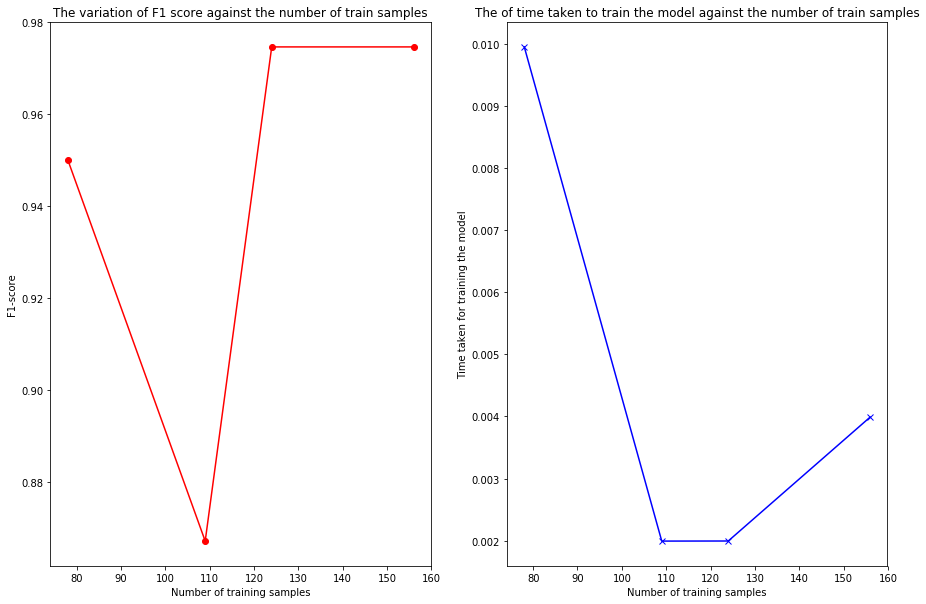

In [67]:
# plot precision, recall, f1 and time against sample size
fig, axes = plt.subplots(1, 2, figsize = (15, 10))

axes[0].plot(frame_DT['sample'], frame_DT['F1'], c = 'r', marker = 'o')
axes[0].set_title('The variation of F1 score against the number of train samples')
axes[0].set_xlabel('Number of training samples')
axes[0].set_ylabel('F1-score')

axes[1].plot(frame_DT['sample'], frame_DT['time'], c = 'b', marker = 'x')
axes[1].set_xlabel('Number of training samples')
axes[1].set_ylabel('Time taken for training the model')
axes[1].set_title('The of time taken to train the model against the number of train samples')



### Comparing the performance of each model

The graphs above show neatly that increasing the number of training samples causes an improvement in accuracy (precision, recall and F1 score). Even if the training time goes slighly up, considering that our dataset is small, we can choose the maximum possible train set to train the model on. In this section we choose the "final" model that will be used to the live test. 
I choose the last row of each data frame that shows the performace of the different models to be able to come to a decision about the best possible one.

In [68]:
# creating the summary data frame from frame_SVM ... frameK

frames = [frame_SVM, frame_DT, frame_RF, frame_K]
to_frame = []
for frame in frames:
    to_frame.append(list(frame[['name', 'precision', 'recall', 'F1', 'time']].iloc[3]))

    
frame_dec = pd.DataFrame(data = to_frame, columns = ['name', 'precision', 'recall', 'F1', 'time'])
frame_dec
                         

,name,precision,recall,F1,time
0,SVM,1.000000,1.000000,1.000000,0.006881
1,Decision Tree,0.969697,0.981481,0.974603,0.003989
2,Random Forest,0.969697,0.981481,0.974603,0.008974
3,K-mearest,0.972222,0.966667,0.967963,0.004027


Any of the models can be chosen, all of them works very well. (The high precision can be thanked to the small size of the dataset and that the data was clean and the clusters were distinct.) After a discussion with the class, we chose the K-nearest model to be tested live.